# Problem overview

Consider the following sketch - the monoshock, non-linkage rear suspension of a motorcycle. I'd like to know what the mathematical relationship is between the movement of the rear wheel in a vertical direction (ie. that which the rider is going to feel) and the force exerted upon the spring. It's not going to be linear since the wheel travels in an arc but the spring acts linearly. It will be close to linear for a small region around the point where the swingarm is moving perpendicular to the spring. It's not rocket science and the answer might not actually be that interesting, but I'm curious.

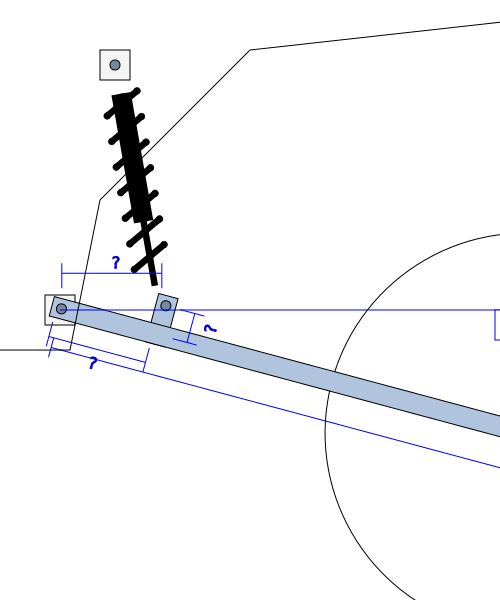

In [20]:
%%svg
<!-- This the SVG diagram which is used for illustrating the problem and each of the steps -->

<svg xmlns="http://www.w3.org/2000/svg" viewBox="0 0 500 600" height="400px">
  <defs>
    
    <circle id="pivot" r="5" cx="5" cy="5" stroke="black" fill="lightslategrey" />
    
    <g id="mount">
      <rect height="30" width="30" stroke="black" fill="whitesmoke" />
      <use href="#pivot" x="10" y="10" />
    </g>
    
    <g id="everything" style="visibility:var(--vis-everything, hidden)">
        <!-- upper shock mount -->
        <use href="#mount" x="100" y="50" />
        
        <!-- shock -->
        <g transform="translate(125,60) rotate(80) scale(0.65) translate(50,0)">
            <rect height="10" width="300" y="10" />
            <rect height="30" width="200" />
            
            <g transform="translate(0, -10)">
                <g id="coil" transform="rotate(-30)">
                    <circle r="5" cx="0" cy="0" stroke="black" fill="black" />
                    <circle r="5" cx="0" cy="60" stroke="black" fill="black" />
                    <rect height="60" width="10" x="-5" />
                </g>
                <use href="#coil" x="40" />
                <use href="#coil" x="80" />
                <use href="#coil" x="120" />
                <use href="#coil" x="160" />
                <use href="#coil" x="200" />
                <use href="#coil" x="240" />
            </g>
        </g>

        <g id="swingarm" style="visibility:var(--vis-swingarm)" >
          <g transform="translate(50,300)" >
              <!-- swingarm pivot -->
              <use href="#mount" x="-5" y="-5" />
            
              <g transform="rotate(15,15,15)" >
                  <!-- wheel -->
                  <circle r="200" cx="490" cy="10" stroke="black" fill="none" />

                  <!-- arm and lower shock mount -->
                  <g style="visibility:var(--vis-swingarm-mount)">
                    <rect x="100" y="-30" width="20" height="50" stroke="black" fill="lightsteelblue" />
                    <use href="#pivot" x="105" y="-25" />
                  </g>  
                  <rect x="0" y="0" width="500" height="20" stroke="black" fill="lightsteelblue" />
                  <use href="#pivot" x="5" y="5" />
                  <use href="#pivot" x="485" y="5" />
                  <!-- length marking on swingarm -->
                  <g style="visibility:var(--vis-geo1, hidden)">
                    <line x1="10" y1="40" x2="10" y2="60" stroke="blue" />
                    <line x1="490" y1="40" x2="490" y2="60" stroke="blue" />
                    <line x1="10" y1="50" x2="490" y2="50" stroke="blue" />
                    <!-- forward ref -->
                    <use href="#dSwingarm" x="250" y="80" stroke="blue" />
                  </g>  
                
                  <!-- dimension markings on swingarm/shock geometry -->
                  <g style="visibility:var(--vis-geo2, hidden)">
                    <line x1="5" y1="25" x2="5" y2="50" stroke="blue" />
                    <line x1="105" y1="25" x2="105" y2="50" stroke="blue" />
                    <line x1="5" y1="40" x2="105" y2="40" stroke="blue" />
                    <g transform="translate(40, 60)">
                      <!-- forward ref; not defined until later -->
                      <use href="#dc" style="visibility:var(--vis-geo2-known, hidden)" />
                      <text id="geoQuestionMark" x="10" stroke="blue" style="visibility:var(--vis-geo2-unknown, hidden)">?</text>
                    </g>
                    <line x1="125" y1="10" x2="150" y2="10" stroke="blue" />
                    <line x1="125" y1="-20" x2="150" y2="-20" stroke="blue" />
                    <line x1="140" y1="10" x2="140" y2="-20" stroke="blue" />
                    <g transform="translate(165, 5) rotate(-90)" >
                      <!-- forward ref; not defined until later -->
                      <use href="#db" style="visibility:var(--vis-geo2-known, hidden)" />
                      <use href="#geoQuestionMark" />
                    </g>
                    <g transform="translate(5, -10) rotate(-15)">
                        <line x1="0" y1="0" x2="0" y2="-25" stroke="blue" />
                        <line x1="100" y1="0" x2="100" y2="-25" stroke="blue" />
                        <line x1="0" y1="-15" x2="100" y2="-15" stroke="blue" />
                        <g transform="translate(40, -20)" >
                          <!-- forward ref; not defined until later -->
                          <use href="#da" style="visibility:var(--vis-geo2-known, hidden)" />
                          <use href="#geoQuestionMark" />
                        </g>
                    </g>
                  </g> <!-- dimension markings -->
              </g> <!-- rotation -->
            
            <!-- swingarm arc markings -->
            <g style="visibility:var(--vis-swingarm-tri, hidden)">
              <line x1="10" y1="10" x2="475" y2="10" stroke="blue" />
              <line x1="475" y1="10" x2="475" y2="130" stroke="blue" />
              <rect x="445" y="10" height="30" width="30" stroke="blue" fill="white" />
              <line x1="485" y1="10" x2="505" y2="10" stroke="blue" />
              <line x1="485" y1="130" x2="505" y2="130" stroke="blue" />
              <line x1="495" y1="10" x2="495" y2="130" stroke="blue" />
              <text stroke="blue" transform="translate(520,90) rotate(-90)">
                d <tspan baseline-shift="sub">y</tspan> 
              </text>
            </g>
            
            </g> <!-- translation -->
        
        </g> <!-- swingarm -->
        
        <g id="bodywork" style="visibility:var(--vis-bodywork)" >
          <path d="M0 350 L70 350  L100 200  L250 50  L700 0" stroke="black" fill="none" />
        </g>
        
    </g>
    
  </defs>

  <!-- Diagram for description of the problem -->
  <use href="#everything" style="--vis-everything:visible;" />
</svg>

The approach I'm going to take here requires 2 steps:

1. Determine, for a useful range of wheel travel, the relationship between vertical motion of the wheel and the motion of the spring/shock absorber

1. Since the spring in this case is a constant rate (non-progressive) then Hooke's law dictates that the relationship between the spring length and force is linear. Given that we know the motion relationship between the wheel and spring then we should be able to work backwards to determine how much force is necessary at the wheel to counteract the forced exerted by the spring at a given position.

# Wheel and swingarm motion

It's the vertical motion of the wheel that the rider feels (or the vertical motion of the bike over the wheel) but the spring is actuated by the swingarm, which travels in an arc. So what's the relationship between those two?

In [21]:
import math
# useful constants
pi_deg = 180.0 / math.pi

# known dimensions
# lengths are millimeters, angles are radians
d_y_pivot1_rest = 300.0 # height of front swingarm pivot at rest (full extension)
d_y_axle = 200.0 # height of rear axle above ground
l_pivot1_axle = 430.0 # length of swingarm between front pivot and axle
d_y_swingarm_pivot2 = 50.0 # distance between the swingarm centre-line and the swingarm shock pivot
d_x_swingarm_pivot2 = 100.0 # distance along the swingarm centre-line between swingarm pivot and shock pivot
d_pivot1_pivot3 = 250.0 # distance between swingarm pivot and upper shock mount
d_pivot2_pivot3_rest = 270.0 # distance between upper and lower shock mounts at full extension

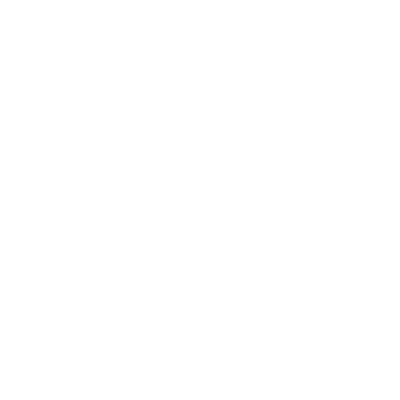

In [85]:
from string import Template
from IPython.display import SVG

s = Template('''
<svg xmlns="http://www.w3.org/2000/svg" viewBox="50 150 400 400" height="400px">
  <defs>
    <text id="dSwingarm">$l_pivot1_axle mm</text>
  </defs>
  <use href="#everything" style="--vis-swingarm:visible; --vis-swingarm-tri:visible; --vis-geo1:visible; --vis-swingarm-mount:hidden;" />
</svg>
''')

SVG(s.substitute(l_pivot1_axle=l_pivot1_axle))

In [84]:
from IPython.display import Markdown
from string import Template

t = Template('''
The distance that the rear wheel has travelled in the vertical direction is simply the opposite side of a right triangle formed between the swingarm and the horizontal.

In the above sketch $$d_y$$ will be at maximum when the wheel is at rest on the ground. As the wheel compresses the suspension $$d_y$$ will decrease to 0 when the swingarm is horizontal, before increasing again as the swingarm rises above the horizontal. This will mean that the swingarm angle that is derived - $$ \\theta = \\arcsin \\frac{d_y}{$l_pivot1_axle} $$ - will begin positive, fall to 0 then become positive again. 

To keep the formula continuous and simplify discussion we could consider the travel of the wheel in one side of the horizontal to be positive and the other negative. The swingarm angle would then take on the same sign as $$d_y$$.

Or we could go one step further and consider the 'bump' that has been applied to the wheel to begin at 0 while the wheel is at maximum extension, rising as the suspension compresses ($$d_y$$ falls) and continuing to rise as the swingarm passes horizontal and $$d_y$$ rises again. Given that the independent variable in which I am interested here is the _vertical travel of the rear wheel_ then transforming other measurements into this domain will simplify both plotting and discussing results.

With the suspension at full extension (ie. the bike on a stand) the height of the swingarm pivot above ground was measured as ${d_y_pivot1_rest}mm and the height of the rear axle ${d_y_axle}mm. So at full extension $$ d_y = ${bump_rest}mm $$ and for the purpose of relating the wheel travel to swingarm angle our new independent variable $$d_{bump}$$ is simply $$ d_y + $bump_rest $$ where $$d_y$$ is negative below horizontal and positive above (and so also the swingarm angle).

We can see this plotted as:
''')
Markdown(t.substitute(
    l_pivot1_axle='{:.0f}'.format(l_pivot1_axle),
    d_y_pivot1_rest='{:.0f}'.format(d_y_pivot1_rest),
    d_y_axle='{:.0f}'.format(d_y_axle),
    bump_rest='{:.0f}'.format(d_y_pivot1_rest - d_y_axle)
))


The distance that the rear wheel has travelled in the vertical direction is simply the opposite side of a right triangle formed between the swingarm and the horizontal.

In the above sketch $d_y$ will be at maximum when the wheel is at rest on the ground. As the wheel compresses the suspension $d_y$ will decrease to 0 when the swingarm is horizontal, before increasing again as the swingarm rises above the horizontal. This will mean that the swingarm angle that is derived - $ \theta = \arcsin \frac{d_y}{430} $ - will begin positive, fall to 0 then become positive again. 

To keep the formula continuous and simplify discussion we could consider the travel of the wheel in one side of the horizontal to be positive and the other negative. The swingarm angle would then take on the same sign as $d_y$.

Or we could go one step further and consider the 'bump' that has been applied to the wheel to begin at 0 while the wheel is at maximum extension, rising as the suspension compresses ($d_y$ falls) and continuing to rise as the swingarm passes horizontal and $d_y$ rises again. Given that the independent variable in which I am interested here is the _vertical travel of the rear wheel_ then transforming other measurements into this domain will simplify both plotting and discussing results.

With the suspension at full extension (ie. the bike on a stand) the height of the swingarm pivot above ground was measured as 300mm and the height of the rear axle 200mm. So at full extension $ d_y = 100mm $ and for the purpose of relating the wheel travel to swingarm angle our new independent variable $d_{bump}$ is simply $ d_y + 100 $ where $d_y$ is negative below horizontal and positive above (and so also the swingarm angle).

We can see this plotted as:


In [23]:
%matplotlib inline

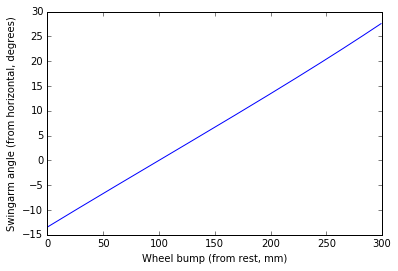

In [80]:
import matplotlib.pyplot as plt
from math import asin, pi
def wheel_bump_to_swingarm_angle_abs(bump):
    return asin((bump - (d_y_pivot1_rest - d_y_axle)) / l_pivot1_axle)

bumps = xrange(0,300)

plt.plot(bumps, [wheel_bump_to_swingarm_angle_abs(b) * pi_deg for b in bumps])
plt.xlabel('Wheel bump (from rest, mm)')
plt.ylabel('Swingarm angle (from horizontal, degrees)');

In [82]:
a_swingarm_horz_rest = wheel_bump_to_swingarm_angle_abs(0) # angle of swingarm relative to horizon at full extension

from string import Template
from IPython.display import Markdown

t = Template('''
Likewise, for the sake of convenience we can also transform the swingarm angle from an absolute above/below horizontal figure to a 'deflection', where 0 deflection is the fully extended position. This will prove useful in a moment as we consider the geometry of the suspension pickup points.

As $$d_y$$ has been measured at ${bump_rest}mm at full extension and the swingarm is ${l_pivot1_axle}mm long then this suggests that the angle between the swingarm and horizontal is $$ \\arcsin \\frac{$bump_rest}{$l_pivot1_axle} = $a_swingarm_horz_rest $$ degrees.

So our swingarm rests at -$a_swingarm_horz_rest degrees when fully extended and we can simply subtract this from our results above in order to bias the results from 0.
''')

Markdown(t.substitute(
    bump_rest='{:.0f}'.format(d_y_pivot1_rest - d_y_axle),
    l_pivot1_axle='{:.0f}'.format(l_pivot1_axle),
    a_swingarm_horz_rest='{:.2f}'.format(a_swingarm_horz_rest * pi_deg)
))


Likewise, for the sake of convenience we can also transform the swingarm angle from an absolute above/below horizontal figure to a 'deflection', where 0 deflection is the fully extended position. This will prove useful in a moment as we consider the geometry of the suspension pickup points.

As $d_y$ has been measured at 100mm at full extension and the swingarm is 430mm long then this suggests that the angle between the swingarm and horizontal is $ \arcsin \frac{100}{430} = -13.45 $ degrees.

So our swingarm rests at --13.45 degrees when fully extended and we can simply subtract this from our results above in order to bias the results from 0.


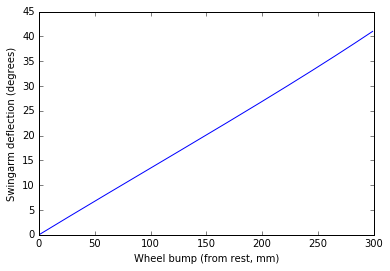

In [73]:
def wheel_bump_to_swingarm_deflection(bump):
    return wheel_bump_to_swingarm_angle_abs(bump) - a_swingarm_horz_rest

plt.plot(bumps, [wheel_bump_to_swingarm_deflection(b) * pi_deg for b in bumps])
plt.xlabel('Wheel bump (from rest, mm)')
plt.ylabel('Swingarm deflection (degrees)');

In the above calculations I have consider a useful range of wheel bump to be from 0 to 300mm. This is typical of a full size dirtbike. The bike in consideration here is not full size but a pitbike. 300mm is an unrealistic amount of suspension travel for a bike of this size but will be used here to explore the boundaries of the geometry.

We can also see that for the range in which we are interested the relationship is very linear. Of the top of my head I could have said that sine was quite linear over a reasonable range near 0 degrees, but I wouldn't have said it was _so_ linear for a range as large as we interested. This is likely advantagous for this particular use case - suspension - as it means that spring rate is fairly constant for a large range of suspension travel and as such is easier to design for than if not. 

How far off a straight line is it? Let's consider the slope of the line around the point where the swingarm is horizontal. If we take a couple of points close to but above and below the horizontal, say 1mm of deflection either side, then we can get a coarse estimate of the slope at that point. ie. $ \frac {\Delta \theta} {\Delta d} $ where $\Delta \theta$ is the difference between the angle of the swingarm at +/- 1mm of horizontal and $\Delta d$ is the difference in deflection at which that occurred - in this case 2mm. The slope around the horizontal swingarm is then:

In [118]:
from string import Template
from IPython.display import Markdown

t = Template('$$ \\frac {$d2 - ($d1)} {2} = $slope $$ deg/mm')

Markdown(t.substitute(
    d2='{:.4f}'.format(wheel_bump_to_swingarm_angle_abs(101) * pi_deg),
    d1='{:.4f}'.format(wheel_bump_to_swingarm_angle_abs(99) * pi_deg),
    slope='{:.4f}'.format(slope * pi_deg)
))

$ \frac {0.1332 - (-0.1332)} {2} = 0.1332 $ deg/mm

Which superimposed on the real curve looks very close to the ideal straight line for all of the range over which we are interested:

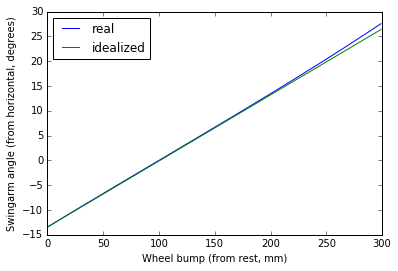

In [138]:
slope = (wheel_bump_to_swingarm_angle_abs(101) - wheel_bump_to_swingarm_angle_abs(99)) / 2

plt.plot(bumps, [wheel_bump_to_swingarm_angle_abs(b) * pi_deg for b in bumps], label='real')
plt.plot(bumps, [slope * b * pi_deg - (-a_swingarm_horz_rest * pi_deg) for b in bumps], label='idealized')
plt.xlabel('Wheel bump (from rest, mm)')
plt.ylabel('Swingarm angle (from horizontal, degrees)')
plt.legend(loc='upper left');

# Pivot geometry

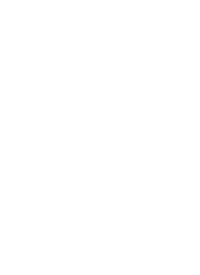

In [27]:
from string import Template
s = Template("""
<svg xmlns="http://www.w3.org/2000/svg" viewBox="100 150 200 275" height="400px">
  <use href="#everything" style="--vis-swingarm:visible; --vis-geo2:visible; --vis-geo2-unknown:visible" />
</svg>
""");

from IPython.display import SVG
SVG(data=s.substitute())

In [28]:
a_swingarm_pivot2 = math.atan(d_y_swingarm_pivot2 / d_x_swingarm_pivot2)
'Included angle between swingarm centre-line and shock mount on swingarm - {} degrees'.format(a_swingarm_pivot2 * pi_deg)

'Included angle between swingarm centre-line and shock mount on swingarm - 26.5650511771 degrees'

In [29]:
d_pivot1_pivot2 = math.sqrt(d_x_swingarm_pivot2**2 + d_y_swingarm_pivot2**2)

def includedAngleMountsResting():
    a = d_pivot2_pivot3_rest
    b = d_pivot1_pivot3
    c = d_pivot1_pivot2
    alpha = math.acos(((b**2) + (c**2) - (a**2)) / (2*b*c))
    return alpha

a_pivot2_pivot3_rest = includedAngleMountsResting()
'Included angle between upper and lower shock mounts at rest - {} degrees'.format(a_pivot2_pivot3_rest * pi_deg)

'Included angle between upper and lower shock mounts at rest - 87.8471235095 degrees'

# Wheel and shock motion

In [141]:
import matplotlib.pyplot as plt
def distanceBetweenMounts(includedAngle):
    b = d_pivot1_pivot3
    c = d_pivot1_pivot2
    alpha = includedAngle
    a = math.sqrt((b**2) + (c**2) - (2*b*c * math.cos(alpha)))
    return a

plt.plot(bumps, [d_pivot2_pivot3_rest - distanceBetweenMounts(a_pivot2_pivot3_rest - d) for d in deflections]);
plt.xlabel('Wheel bump (from rest, mm)')
plt.ylabel('Shock compression (mm)');

NameError: name 'deflections' is not defined